In [1]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import numpy as np

Using TensorFlow backend.


In [2]:
vgg16_model = VGG16(weights='imagenet',include_top=False, input_shape=(150,150,3))

In [3]:
# 搭建全连接层
top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16_model.output_shape[1:]))
top_model.add(Dense(256,activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(2,activation='softmax'))

model = Sequential() # 初始为空的模型
model.add(vgg16_model)
model.add(top_model)

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,     # 随机旋转度数
    width_shift_range = 0.2, # 随机水平平移
    height_shift_range = 0.2,# 随机竖直平移
    rescale = 1/255,         # 数据归一化
    shear_range = 20,       # 随机错切变换
    zoom_range = 0.2,        # 随机放大
    horizontal_flip = True,  # 水平翻转
    fill_mode = 'nearest',   # 填充方式
) 
test_datagen = ImageDataGenerator(
    rescale = 1/255,         # 数据归一化
) 

In [5]:
batch_size = 32

# 生成训练数据
train_generator = train_datagen.flow_from_directory(
    'image/train',
    target_size=(150,150),
    batch_size=batch_size,
    )

# 测试数据
test_generator = test_datagen.flow_from_directory(
    'image/test',
    target_size=(150,150),
    batch_size=batch_size,
    )

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [7]:
# 定义优化器，代价函数，训练过程中计算准确率
model.compile(optimizer=SGD(lr=1e-4,momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=20,validation_data=test_generator,validation_steps=len(test_generator))


Epoch 1/20
13/13 [==============================] - 266s 20s/step - loss: 0.9711 - accuracy: 0.4500 - val_loss: 0.6548 - val_accuracy: 0.5600
Epoch 2/20
13/13 [==============================] - 319s 25s/step - loss: 0.8302 - accuracy: 0.5450 - val_loss: 0.6229 - val_accuracy: 0.6600
Epoch 3/20
13/13 [==============================] - 255s 20s/step - loss: 0.7580 - accuracy: 0.5625 - val_loss: 0.6282 - val_accuracy: 0.6500
Epoch 4/20
13/13 [==============================] - 247s 19s/step - loss: 0.6692 - accuracy: 0.6025 - val_loss: 0.6160 - val_accuracy: 0.7650
Epoch 5/20
13/13 [==============================] - 244s 19s/step - loss: 0.6526 - accuracy: 0.6450 - val_loss: 0.5933 - val_accuracy: 0.6850
Epoch 6/20
13/13 [==============================] - 254s 20s/step - loss: 0.5983 - accuracy: 0.6850 - val_loss: 0.5337 - val_accuracy: 0.7600
Epoch 7/20
13/13 [==============================] - 254s 20s/step - loss: 0.6059 - accuracy: 0.6475 - val_loss: 0.5635 - val_accuracy: 0.7900
Epoch

In [8]:
# pip install h5py
model.save('model_vgg16.h5')

# 测试

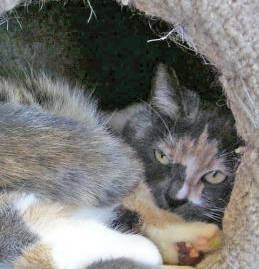

In [9]:
from keras.models import load_model
import numpy as np

label = np.array(['cat','dog'])
# 载入模型
model = load_model('model_vgg16.h5')

# 导入图片
image = load_img('image/test/cat/cat.1003.jpg')
image

In [10]:
image = image.resize((150,150))
image = img_to_array(image)
image = image/255
image = np.expand_dims(image,0)
image.shape

(1, 150, 150, 3)

In [11]:
print(label[model.predict_classes(image)])

['cat']
